In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating environment at `~/code/FermiCG/Project.toml`


2-element Vector{String}:
 ".ipynb_checkpoints"
 "ccsd_scan.ipynb"

In [2]:
molecule = "
He         0.00000        0.00000       -0.54101
He        -0.00000        0.00000        1.85551
He        -0.00000        0.00000       -2.86818
He         1.62940        1.18383        0.64473
He         1.62940       -1.18383        0.64473
He        -0.62238        1.91548        0.64473
He        -0.62238       -1.91548        0.64473
He        -2.01405        0.00000        0.64473
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)
pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)




******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/td/qpnnxwv93pq0t7bbdkh5rvzr0000gn/T/tmpe6uzngus
max_memory 4000 MB (current use 0 MB)
init E= -22.8573394193377
  HOMO = -0.883576513650389  LUMO = 0.164811329094599
cycle= 1 E= -22.8384427044276  delta_E= 0.0189  |g|= 0.0156  |ddm|=  0.2
  HOMO = -0.896542476348596  LUMO = 0.165353024329552
cycle= 2 E= -22.8385323174281  delta_E= -8.96e-05  |g|= 0.00296  |ddm|= 0.022
  HOMO = -0.896547666002472  LUMO = 0.165380530073005
cycle= 3 E= -22.838536284165  delta_E= -3.97e-06  |g|= 0.000103  |ddm|= 0.00584
  HOMO = -0.896501050738904  LUMO = 0.165383038722861
cycle= 4 E= -22.8385362888349  delta_E= -4.67e-09  |g|= 7.4e-06  |ddm|= 0.000215
  HOMO = -0

    8

    He       0.0000000000000000       0.0000000000000000      -0.5680605000000000 
    He      -0.0000000000000000       0.0000000000000000       1.9482855000000001 
    He      -0.0000000000000000       0.0000000000000000      -3.0115890000000003 
    He       1.7108700000000001       1.2430215000000000       0.6769665000000000 
    He       1.7108700000000001      -1.2430215000000000       0.6769665000000000 
    He      -0.6534990000000001       2.0112540000000001       0.6769665000000000 
    He      -0.6534990000000001      -2.0112540000000001       0.6769665000000000 
    He      -2.1147525000000003       0.0000000000000000       0.6769665000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF r

 Hartree-Fock Energy: -22.84501959E(CCSD) = -23.11696907642528  E_corr = -0.2719494893578724
CCSD total energy    -23.11696908
CCSD(T) correction = -6.56264652121553e-05
CCSD(T) total energy -23.11703470
    8

    He       0.0000000000000000       0.0000000000000000      -0.6762625000000000 
    He      -0.0000000000000000       0.0000000000000000       2.3193874999999999 
    He      -0.0000000000000000       0.0000000000000000      -3.5852250000000003 
    He       2.0367500000000001       1.4797875000000000       0.8059125000000000 
    He       2.0367500000000001      -1.4797875000000000       0.8059125000000000 
    He      -0.7779750000000001       2.3943500000000002       0.8059125000000000 
    He      -0.7779750000000001      -2.3943500000000002       0.8059125000000000 
    He      -2.5175625000000004       0.0000000000000000       0.8059125000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564941E(CCSD) = -23.11692063631508  E_corr = -0.2712712274134229
CCSD total energy    -23.11692064
CCSD(T) correction = -2.57801908648148e-05
CCSD(T) total energy -23.11694642
    8

    He       0.0000000000000000       0.0000000000000000      -0.7844645000000000 
    He      -0.0000000000000000       0.0000000000000000       2.6904895000000000 
    He      -0.0000000000000000       0.0000000000000000      -4.1588609999999999 
    He       2.3626299999999998       1.7165534999999998       0.9348585000000000 
    He       2.3626299999999998      -1.7165534999999998       0.9348585000000000 
    He      -0.9024510000000000       2.7774459999999999       0.9348585000000000 
    He      -0.9024510000000000      -2.7774459999999999       0.9348585000000000 
    He      -2.9203725000000000       0.0000000000000000       0.9348585000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84564787E(CCSD) = -23.116642044358  E_corr = -0.2709941729438101
CCSD total energy    -23.11664204
CCSD(T) correction = -1.12932120511261e-05
CCSD(T) total energy -23.11665334
    8

    He       0.0000000000000000       0.0000000000000000      -0.8926664999999999 
    He      -0.0000000000000000       0.0000000000000000       3.0615915000000000 
    He      -0.0000000000000000       0.0000000000000000      -4.7324970000000004 
    He       2.6885100000000000       1.9533194999999999       1.0638045000000000 
    He       2.6885100000000000      -1.9533194999999999       1.0638045000000000 
    He      -1.0269269999999999       3.1605420000000000       1.0638045000000000 
    He      -1.0269269999999999      -3.1605420000000000       1.0638045000000000 
    He      -3.3231825000000002       0.0000000000000000       1.0638045000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DI

 Hartree-Fock Energy: -22.84564214E(CCSD) = -23.11651265043246  E_corr = -0.2708705097784624
CCSD total energy    -23.11651265
CCSD(T) correction = -5.49063394547572e-06
CCSD(T) total energy -23.11651814
    8

    He       0.0000000000000000       0.0000000000000000      -1.0008684999999999 
    He      -0.0000000000000000       0.0000000000000000       3.4326935000000001 
    He      -0.0000000000000000       0.0000000000000000      -5.3061330000000009 
    He       3.0143900000000001       2.1900854999999999       1.1927505000000000 
    He       3.0143900000000001      -2.1900854999999999       1.1927505000000000 
    He      -1.1514030000000002       3.5436380000000005       1.1927505000000000 
    He      -1.1514030000000002      -3.5436380000000005       1.1927505000000000 
    He      -3.7259925000000003       0.0000000000000000       1.1927505000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563885E(CCSD) = -23.11645032220411  E_corr = -0.2708114694410964
CCSD total energy    -23.11645032
CCSD(T) correction = -2.8982367034547e-06
CCSD(T) total energy -23.11645322
    8

    He       0.0000000000000000       0.0000000000000000      -1.1090704999999998 
    He      -0.0000000000000000       0.0000000000000000       3.8037954999999997 
    He      -0.0000000000000000       0.0000000000000000      -5.8797689999999996 
    He       3.3402699999999994       2.4268514999999997       1.3216964999999998 
    He       3.3402699999999994      -2.4268514999999997       1.3216964999999998 
    He      -1.2758790000000000       3.9267339999999997       1.3216964999999998 
    He      -1.2758790000000000      -3.9267339999999997       1.3216964999999998 
    He      -4.1288024999999999       0.0000000000000000       1.3216964999999998 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84563793E(CCSD) = -23.11642059031193  E_corr = -0.2707826647910429
CCSD total energy    -23.11642059
CCSD(T) correction = -1.63106276256047e-06
CCSD(T) total energy -23.11642222
    8

    He       0.0000000000000000       0.0000000000000000      -1.2172725000000000 
    He      -0.0000000000000000       0.0000000000000000       4.1748975000000002 
    He      -0.0000000000000000       0.0000000000000000      -6.4534050000000001 
    He       3.6661500000000000       2.6636175000000000       1.4506425000000001 
    He       3.6661500000000000      -2.6636175000000000       1.4506425000000001 
    He      -1.4003550000000000       4.3098299999999998       1.4506425000000001 
    He      -1.4003550000000000      -4.3098299999999998       1.4506425000000001 
    He      -4.5316125000000005       0.0000000000000000       1.4506425000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563769E(CCSD) = -23.11640600922615  E_corr = -0.270768318466559
CCSD total energy    -23.11640601
CCSD(T) correction = -9.66401951380452e-07
CCSD(T) total energy -23.11640698
    8

    He       0.0000000000000000       0.0000000000000000      -1.3254745000000001 
    He      -0.0000000000000000       0.0000000000000000       4.5459995000000006 
    He      -0.0000000000000000       0.0000000000000000      -7.0270410000000005 
    He       3.9920300000000002       2.9003835000000002       1.5795885000000003 
    He       3.9920300000000002      -2.9003835000000002       1.5795885000000003 
    He      -1.5248310000000003       4.6929260000000008       1.5795885000000003 
    He      -1.5248310000000003      -4.6929260000000008       1.5795885000000003 
    He      -4.9344225000000010       0.0000000000000000       1.5795885000000003 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

 Hartree-Fock Energy: -22.84563750E(CCSD) = -23.11639849052331  E_corr = -0.2707609903471888
CCSD total energy    -23.11639849
CCSD(T) correction = -5.97472924552497e-07
CCSD(T) total energy -23.11639909
    8

    He       0.0000000000000000       0.0000000000000000      -1.4336765000000002 
    He      -0.0000000000000000       0.0000000000000000       4.9171015000000002 
    He      -0.0000000000000000       0.0000000000000000      -7.6006770000000019 
    He       4.3179100000000004       3.1371495000000000       1.7085345000000003 
    He       4.3179100000000004      -3.1371495000000000       1.7085345000000003 
    He      -1.6493070000000003       5.0760220000000009       1.7085345000000003 
    He      -1.6493070000000003      -5.0760220000000009       1.7085345000000003 
    He      -5.3372325000000007       0.0000000000000000       1.7085345000000003 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563739E(CCSD) = -23.11639445120077  E_corr = -0.2707570600440846
CCSD total energy    -23.11639445
CCSD(T) correction = -3.82895623008312e-07
CCSD(T) total energy -23.11639483
    8

    He       0.0000000000000000       0.0000000000000000      -1.5418784999999999 
    He      -0.0000000000000000       0.0000000000000000       5.2882034999999998 
    He      -0.0000000000000000       0.0000000000000000      -8.1743130000000015 
    He       4.6437900000000001       3.3739154999999998       1.8374805000000001 
    He       4.6437900000000001      -3.3739154999999998       1.8374805000000001 
    He      -1.7737830000000001       5.4591180000000001       1.8374805000000001 
    He      -1.7737830000000001      -5.4591180000000001       1.8374805000000001 
    He      -5.7400425000000004       0.0000000000000000       1.8374805000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


 Hartree-Fock Energy: -22.84563735E(CCSD) = -23.11639215705445  E_corr = -0.2707548041951698
CCSD total energy    -23.11639216
CCSD(T) correction = -2.53063801848835e-07
CCSD(T) total energy -23.11639241


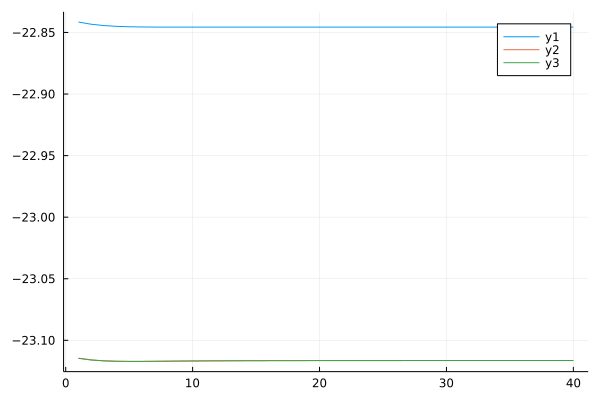

In [3]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()
    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])

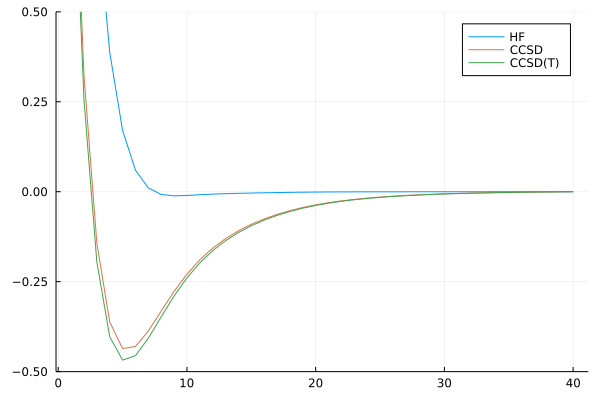

In [4]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))